# ARIMA TIME SERIES - PRICE PREDICTION

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Timeseries packages
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

# MACD packages
import yfinance as yf
import vectorbt as vbt

import warnings
warnings.filterwarnings('ignore')

##

# Data collection and cleaning

In [2]:
# Names of intersted stocks
stock_name = ['TSLA']

tickers = yf.download(tickers = stock_name,
                      start = "2020-01-01", 
                      period="max", 
                      interval = "1d")

tickers.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-24,710.679993,715.219971,702.640015,708.489990,708.489990,13083100
2021-08-25,707.030029,716.969971,704.000000,711.200012,711.200012,12645600
2021-08-26,708.309998,715.400024,697.619995,701.159973,701.159973,13214300
2021-08-27,705.000000,715.000000,702.099976,711.919983,711.919983,13762100
2021-08-30,714.715027,730.979980,712.729980,729.299011,729.299011,16893672


In [3]:
# Drop duplicates
tickers.drop_duplicates(inplace=False)

# Drop NA and infinite values
tickers = tickers.replace(-np.inf, np.nan).dropna()

tickers.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,81.000000,84.258003,80.416000,83.666000,83.666000,51428500
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500


In [4]:
# Count nulls/checking final df
tickers.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##

##

# Autocorrelation and Partial Autocorrelation Analysis

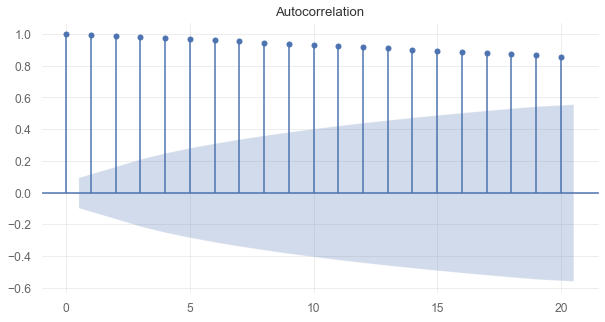

In [5]:
# Plot ACF
plt.rcParams["figure.figsize"] = [10,5]
plot_acf(tickers.Close, lags=20);

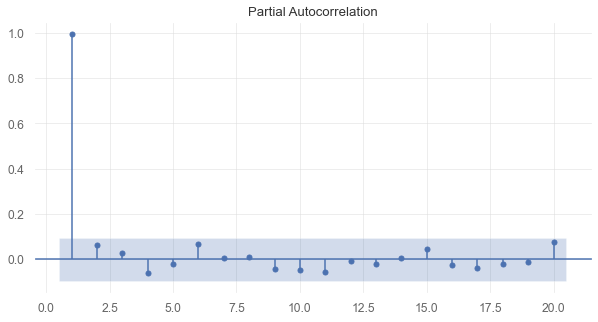

In [6]:
# Plot PACF
plt.rcParams["figure.figsize"] = [10,5]
plot_pacf(tickers.Close, zero=False, lags=20);

In [7]:
# Augmented Dickey-Fuller Test (ADF) Statistical Test for stationarity (https://www.hackdeploy.com/augmented-dickey-fuller-test-in-python/)
adfuller(tickers.Close)

(-1.073672124294949,
 0.7254561677078281,
 1,
 418,
 {'1%': -3.4460914174990296,
  '5%': -2.868479374038333,
  '10%': -2.570466459559076},
 3541.623192653309)

In [8]:
# Run ARIMA model
model = ARIMA(tickers['Close'].values, 
              order=(2,1,2))

In [9]:
# Fit the model to the data
result_ARIMA = model.fit()

# Display model summary
result_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  419
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1834.928
Method:                       css-mle   S.D. of innovations             19.294
Date:                Tue, 31 Aug 2021   AIC                           3681.856
Time:                        05:52:26   BIC                           3706.083
Sample:                             1   HQIC                          3691.432
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5383      0.928      1.658      0.097      -0.281       3.357
ar.L1.D.y     -0.8877      0.016    -55.705      0.000      -0.919      -0.856
ar.L2.D.y     -0.9831      0.027    -36.454      0.000      -1.036      -0.930
ma.L1.D.y      0.8676      0.027     31.777      0.000       0.814       0.921
ma.L2.D.y      0.9589      0.050     19.299      0.000       0.862       1.056
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4515           -0.9018j            1.0085           -0.3239
AR.2           -0.4515           +0.9018j            1.0085            0.3239
MA.1           -0.4524           -0.9155j            1.0212           -0.3230
MA.2           -0.4524           +0.9155j            1.0212            0.3230
-----------------------------------------------------------------------------
"""

,0
0,730.067797
1,732.504288
2,734.001642
3,734.693118
4,737.023289


<AxesSubplot:title={'center':'5 Days Forecast'}>

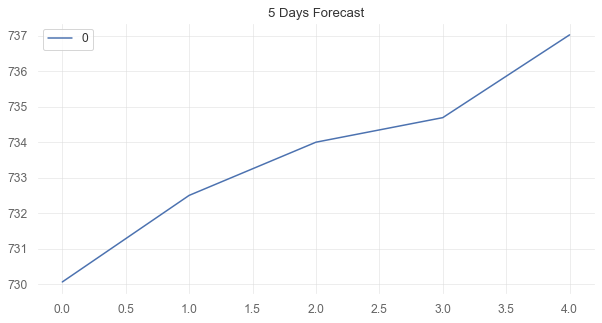

In [10]:
# Forecast close prices
predicted_df = pd.DataFrame(result_ARIMA.forecast(steps=5)[0])

display(predicted_df.head())

plt.rcParams["figure.figsize"] = [10,5]

predicted_df.plot(title="5 Days Forecast")

In [11]:
# Actual close price
actual_close = tickers['Close']

actual_close.head()

Date
2019-12-31    83.666000
2020-01-02    86.052002
2020-01-03    88.601997
2020-01-06    90.307999
2020-01-07    93.811996
Name: Close, dtype: float64

In [12]:
# Concat data
prev_predit_df = pd.concat([actual_close, predicted_df],
                           axis=0)

print("Head")
display(prev_predit_df.head())
print()
print("Tail")
display(prev_predit_df.tail())

Head


,0
2019-12-31 00:00:00,83.666000
2020-01-02 00:00:00,86.052002
2020-01-03 00:00:00,88.601997
2020-01-06 00:00:00,90.307999
2020-01-07 00:00:00,93.811996



Tail


,0
0,730.067797
1,732.504288
2,734.001642
3,734.693118
4,737.023289


In [13]:
# Rename col header
prev_predit_df.rename(columns={0: "Close"}, inplace=True)

# Rename index
prev_predit_df.index.names=["Date"]

# Display final df
prev_predit_df.head()

,Close
Date,
2019-12-31 00:00:00,83.666000
2020-01-02 00:00:00,86.052002
2020-01-03 00:00:00,88.601997
2020-01-06 00:00:00,90.307999
2020-01-07 00:00:00,93.811996


##

##

# Prep for MACD 

In [14]:
tickers_df = prev_predit_df.copy()

tickers_df.reset_index(drop=True, 
                       inplace=True)

tickers_df.head()

,Close
0,83.666000
1,86.052002
2,88.601997
3,90.307999
4,93.811996


## MACD calcualtion and plots

In [15]:
# Calculate MACD data and add to dictionary
macd_list = {}

for ticker in stock_name:
    
    # MACD data
    ewm_fast = tickers_df["Close"].ewm(span = 12, adjust = False).mean()
    
    ewm_slow = tickers_df["Close"].ewm(span = 26, adjust = False).mean()
    
    macd = pd.DataFrame(ewm_fast - ewm_slow)
    
    macd = macd.rename(columns = {"Close":"macd"})
    
    # Signal data
    signal = pd.DataFrame(macd["macd"].ewm(span = 9, adjust = False).mean()).rename(columns = {"macd":"signal"})
    
    # Histogram data
    histogram = pd.DataFrame(macd["macd"] - signal["signal"]).rename(columns = {0:("hist")})
    
    ticker_macd = pd.concat([macd, signal, histogram],
                            axis = 1)
    
    macd_list[ticker] = ticker_macd

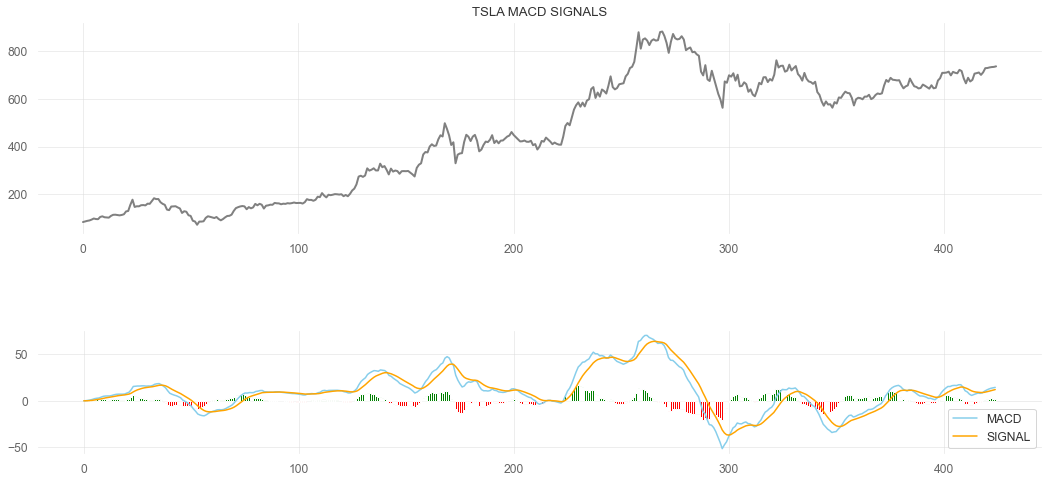

In [16]:
# Plot MACD data per individual stock
for ticker in stock_name:  
    
    plt.rcParams["figure.figsize"] = [18,12]
    
    ax1 = plt.subplot2grid((15,1), (0,0), rowspan = 5, colspan = 5)
    
    ax2 = plt.subplot2grid((15,1), (7,0), rowspan = 3, colspan = 5)

    ax1.plot(tickers_df["Close"], color = 'gray', linewidth = 2, label = ticker)
    
    ax1.set_title(f'{ticker} MACD SIGNALS')
    
    ax2.plot(macd_list[ticker]['macd'],
             color = 'skyblue',
             linewidth = 1.5, 
             label = 'MACD')
    
    ax2.plot(macd_list[ticker]['signal'],
             color = 'orange',
             linewidth = 1.5,
             label = 'SIGNAL')

    for i in range(len(macd_list[ticker])):
        
        if str(macd_list[ticker]['hist'][i])[0] == '-':
            
            ax2.bar(macd_list[ticker].index[i], 
                    macd_list[ticker]['hist'][i],
                    color = 'red')
        else:
            
            ax2.bar(macd_list[ticker].index[i], 
                    macd_list[ticker]['hist'][i], 
                    color = 'green')
    
    plt.legend(loc = 'lower right')

    plt.show()

##

##

# Trading Strategy based on MACD

In [17]:
# Create Trading Strategy function
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    # For loop for range of dates
    for i in range(len(data)):
        
        # Conditional produce signal to buy stock
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
                
        # Conditional produce signal to sell stock
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal

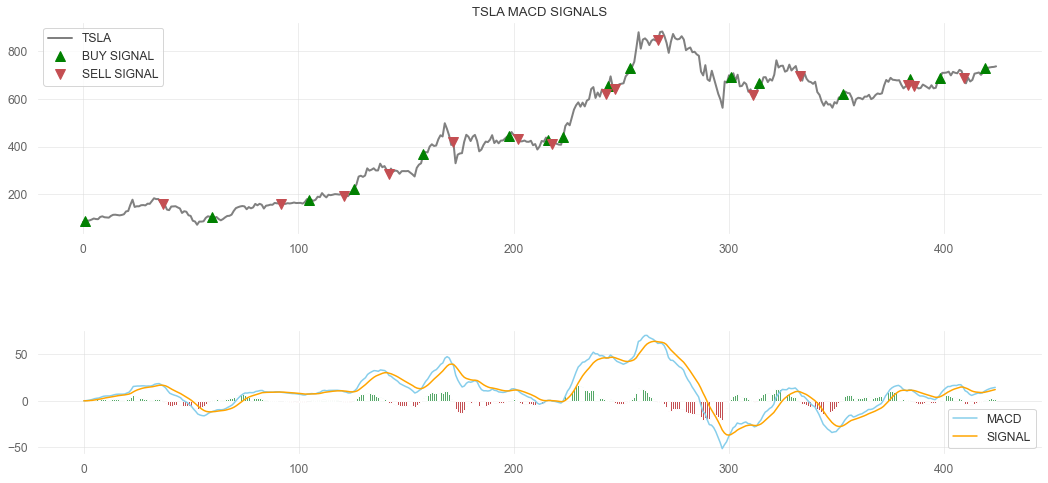

In [18]:
# Run trade strategy and plot buy and sell signals
for ticker in stock_name:  
    
    buy_price, sell_price, macd_signal = implement_macd_strategy(tickers_df["Close"], macd_list[ticker])
    
    plt.rcParams["figure.figsize"] = [18,12]

    ax1 = plt.subplot2grid((15,1), (0,0), rowspan = 5, colspan = 1)
    
    ax2 = plt.subplot2grid((15,1), (7,0), rowspan = 3, colspan = 1)

    ax1.plot(tickers_df["Close"], 
             color = 'gray',
             linewidth = 2,
             label = ticker)
    
    ax1.plot(tickers_df["Close"].index,
             buy_price, 
             marker = '^',
             color = 'green', 
             markersize = 10, 
             label = 'BUY SIGNAL',
             linewidth = 0)
    
    ax1.plot(tickers_df["Close"].index,
             sell_price, 
             marker = 'v', 
             color = 'r',
             markersize = 10,
             label = 'SELL SIGNAL',
             linewidth = 0)
    
    ax1.legend()
    
    ax1.set_title(f'{ticker} MACD SIGNALS')
    
    ax2.plot(macd_list[ticker]['macd'],
             color = 'skyblue',
             linewidth = 1.5, 
             label = 'MACD')
    
    ax2.plot(macd_list[ticker]['signal'], 
             color = 'orange', 
             linewidth = 1.5,
             label = 'SIGNAL')

    for i in range(len(macd_list[ticker])):
        
        if str(macd_list[ticker]['hist'][i])[0] == '-':
            
            ax2.bar(macd_list[ticker].index[i],
                    macd_list[ticker]['hist'][i], 
                    color = 'r')
        else:
            
            ax2.bar(macd_list[ticker].index[i],
                    macd_list[ticker]['hist'][i], 
                    color = 'g')
        
    plt.legend(loc = 'lower right')
    
    plt.show()

In [19]:
# Run strategy to create position
stock_strategy = {}

for ticker in stock_name:     
    
    buy_price, sell_price, macd_signal = implement_macd_strategy(tickers_df["Close"], macd_list[ticker])

    position = []
    
    for i in range(len(macd_signal)):        
        if macd_signal[i] > 1:
            position.append(0)
        else:
            position.append(1)
            
    for i in range(len(tickers_df['Close'])):
        if macd_signal[i] == 1:
            position[i] = 1
        elif macd_signal[i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]
            
    macd = macd_list[ticker]['macd']
    
    signal = macd_list[ticker]['signal']
    
    close_price = tickers_df["Close"]
    
    macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(tickers_df["Close"].index)
    
    position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(tickers_df["Close"].index)

    frames = [close_price, macd, signal, macd_signal, position]
    
    stock_strategy = pd.concat(frames, 
                               join = 'inner',
                               axis = 1)

In [20]:
# Check strategy df
stock_strategy

,Close,macd,signal,macd_signal,macd_position
0,83.666000,0.000000,0.000000,0,1
1,86.052002,0.190336,0.038067,1,1
2,88.601997,0.540710,0.138596,0,1
3,90.307999,0.945148,0.299906,0,1
4,93.811996,1.530766,0.546078,0,1
...,...,...,...,...,...
420,730.067797,11.584012,9.667363,0,1
421,732.504288,12.653026,10.264496,0,1
422,734.001642,13.465825,10.904761,0,1
423,734.693118,14.004338,11.524677,0,1


##

##

# Backtesting

In [21]:
# Create dictionary and populate according to macd_signal
stock_signals = {}

for ticker in tickers:
    entries = []
    exits = []
    
    for sig in stock_strategy["macd_signal"]:
        
        if sig == -1:
            entries.append("False")
            exits.append("True")
        elif sig == 1:
            entries.append("True")
            exits.append("False")
        else:
            entries.append("False")
            exits.append("False")
            
    entries = pd.Series(entries,
                        index = tickers_df["Close"].index)
    
    exits = pd.Series(exits, index = tickers_df["Close"].index)
    
    # Change type to bool
    entries = entries == "True"
    exits = exits == "True"
    
    # Create dataframe
    entries = pd.DataFrame(entries).rename(columns = {0:'entries'}).set_index(tickers_df["Close"].index)
    
    exits = pd.DataFrame(exits).rename(columns = {0:'exits'}).set_index(tickers_df["Close"].index)
    
    close_price = tickers_df["Close"]
    
    frames = [close_price,
              entries, 
              exits]
    
    signals = pd.concat(frames, join = 'inner', axis = 1)

    stock_signals[ticker] = signals

In [22]:
# Initial investment
init_cash = 100000

# Total profit earned from holding stock. Timeframe 3 months
for ticker in stock_name:
    
    price = vbt.YFData.download(ticker, period='6mo').get('Close')
    
    portfolio = vbt.Portfolio.from_holding(price,
                                           init_cash = init_cash)
    
portfolio.total_profit() 

print(f"The total profit of just holding the stock is ${portfolio.total_profit():.2f}")

The total profit of just holding the stock is $1501.88


In [23]:
total_profit = []

for ticker in tickers:
    # Build portfolio using macd signals
    portfolio = vbt.Portfolio.from_signals(stock_signals[ticker]["Close"],
                                           stock_signals[ticker]["entries"],
                                           stock_signals[ticker]["exits"],
                                           init_cash = init_cash)

    # Total profit
    total_profit.append(portfolio.total_profit())
    
print(f"The total profit of exercising MACD signals are ${sum(total_profit):.2f}")

The total profit of exercising MACD signals are $3150428.44
